# ~ Project 2 ~

# Investigate a Brazilain medical appointment dataset 

## Analysis report by Audrey Tan
 ___
 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This [kaggle dataset](https://www.kaggle.com/joniarroba/noshowappointments) contains 100k medical appointments in
Brazil and is focused on the question of whether or not patients show up for their appointments. Each row has a number of characteristics about the patient, such as:
* ‘ScheduledDay’ is the date patient set up their appointment
* ‘Neighborhood’ is the location of the hospital
* ‘Scholarship’ indicates if the patient on Brasilian welfare program Bolsa Família.
* 'No-show' indicates if the patient showed up for their appointment. **No** means **Presence**, and **Yes, Absence**
>
>
> Other characteristics include if the patients suffered certain medical conditions (hypertension, handicap, diabetes and alcoholism) and received SMS reminders for their appointments. 
---
> The goal for this project is to examine the data characteristics and deduce what are the major factors behind the no show of patients. The limited scope of this project invariably implies limited statistical tests were performed in producing this analysis report.   
>
---

### <a href='#Q1'>Research Question 1 - generic factors impacting appointment attendance</a> 
 * Influence of gender, age, SMS reminder on patients missing their appointments

### <a href='#Q2'>Research Question 2 - social factors impacting appointment attendance</a>
 * Were welfare recipients more likely to keep their appointments?
 * Were patients with medical conditions more likely to keep their appointments? 

### <a href='#Q3'>Research Question 3 - geographical factor impacting appointment attendance</a>
 * What is the effect of hospital locations on patients keeping/missing their appointments?


> ## import the required packages for the project

In [1]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I loaded the dataset, checked for cleanliness, and then trim and clean it for analysis.

### General Properties
#### Read in the dataset and looked for patterns of interest 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Rename some columns to improve readability

In [3]:
df.rename(columns={'PatientId': 'PatId', 'AppointmentID':'ApptId', 
                   'ScheduledDay': 'SchdDay', 'AppointmentDay': 'ApptDay',
                   'Neighbourhood': 'Locality', 'Scholarship':'OnWelfare',
                   'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 
                   'SMS_received':'SmsRmdr','No-show': 'NoShow'
                  }, inplace=True)

In [4]:
df.head()

,PatId,ApptId,Gender,SchdDay,ApptDay,Age,Locality,OnWelfare,Hypertension,Diabetes,Alcoholism,Handicap,SmsRmdr,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


These columns contain binary values:
>
> * OnWelfare - 0 or 1
> * Hypertension - 0 or 1
> * Diabetes - 0 or 1
> * Alcoholism - 0 or 1
> * SmsRmdr - 0 or 1
> * NoShow - Yes or No


#### Start looking for data patterns of interest from here

In [5]:
# no missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatId           110527 non-null float64
ApptId          110527 non-null int64
Gender          110527 non-null object
SchdDay         110527 non-null object
ApptDay         110527 non-null object
Age             110527 non-null int64
Locality        110527 non-null object
OnWelfare       110527 non-null int64
Hypertension    110527 non-null int64
Diabetes        110527 non-null int64
Alcoholism      110527 non-null int64
Handicap        110527 non-null int64
SmsRmdr         110527 non-null int64
NoShow          110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Great!** All the columns in the dataset are not null, no missing value to worry about. 

The SchdDay and ApptDay column values need to be converted to real date values. Let's add them to the **To-Fix** list.

> **To-Fix** list so far:
> 1. convert SchdDay to YYYY-MM-DD
> 2. convert ApptDay to YYYY-MM-DD

**Next**, check unique value counts of all columns

In [6]:
df.nunique()

PatId            62299
ApptId          110527
Gender               2
SchdDay         103549
ApptDay             27
Age                104
Locality            81
OnWelfare            2
Hypertension         2
Diabetes             2
Alcoholism           2
Handicap             5
SmsRmdr              2
NoShow               2
dtype: int64

**Check** if PatId can be converted from float to int without affecting data integrity

In [7]:
df.PatId.apply(int).nunique() == df.PatId.nunique()

True

**Confirmed** float to int conversion wouldn't affect data values in PatId column. Add this to **To-Fix** list. 

> **To-Fix** list so far:
>1. convert SchdDay to YYYY-MM-DD
>2. convert ApptDay to YYYY-MM-DD
>3. convert PatId from float to Int

**Wait!** why does Handicap column have 5 unique values when it's supposed to have 0 or 1 values ? 

Let's check what other values are present in the column and add it to **to-fix** list

In [8]:
df.Handicap.unique() 

array([0, 1, 2, 3, 4])

> **To-Fix** list so far:
> 1. convert SchdDay to YYYY-MM-DD
> 2. convert ApptDay to YYYY-MM-DD
> 3. convert PatId from float to Int
> 4. convert Handicap values to 0 (no handicap) and 1 (handicap)

**Next**, let's examine Age column values

In [9]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

**Hmm...** The min. age is -1 and max, 115. Let's take a look to see if they can be excluded from the analysis without impacting the integrity of the dataset. 

In [10]:
df.groupby('Age').count().PatId.head()

Age
-1       1
 0    3539
 1    2273
 2    1618
 3    1513
Name: PatId, dtype: int64

In [11]:
df.groupby('Age').count().PatId.tail()

Age
98     6
99     1
100    4
102    2
115    5
Name: PatId, dtype: int64

**Let's confirm** the proportion of age -1 and over 99 in the dataset is small. 

In [12]:
df.query('Age < 0 | Age >99').count().PatId # no. of rows = 12

12

**Get a quick** visual on the age counts

In [13]:
# set xticks
xticks = np.arange(0, df.Age.max()+10, 10)
xticks

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120])

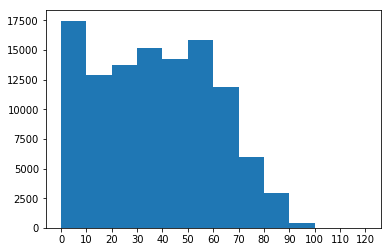

In [14]:
# Histogram is better suited for age visualization here
plt.hist(data=df, x='Age', bins = xticks)
xtick_lbls = ['0','10','20','30','40','50','60','70','80','90','100','110','120']
plt.xticks(xticks,xtick_lbls);

**To be excluded** from the dataset: age -1 and over 99 

> **To-Fix** list so far:
>1. convert SchdDay to YYYY-MM-DD
>2. convert ApptDay to YYYY-MM-DD
>3. convert PatId from float to Int
>4. convert Handicap values to 0 (no handicap) and 1 (handicap)
>5. drop rows with Age -1 or > 99

### Data Cleaning 

**Perform** data cleansing base on the **To-Fix** list assembled:

> **To-Fix** list:
>1. convert SchdDay to YYYY-MM-DD
>2. convert ApptDay to YYYY-MM-DD
>3. convert PatId from float to Int
>4. convert Handicap values to 0 (no handicap) and 1 (handicap)
>5. drop rows with Age -1 or > 99

In [15]:
# Step 1: convert SchdDay to real date in yyyy-mm-dd
df.SchdDay = df.SchdDay.apply(np.datetime64) 
df.SchdDay.head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: SchdDay, dtype: datetime64[ns]

In [16]:
# Step 2: convert ApptDay to real date in yyyy-mm-dd
df.ApptDay = df.ApptDay.apply(np.datetime64) 
df.ApptDay.head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: ApptDay, dtype: datetime64[ns]

In [17]:
# Step 3 : convert PatId from float to Int
df.PatId = df.PatId.apply(int)

In [18]:
# Step 4: re-map hadicap column values: 0 ->0 (no handicap) and 1,2,3,4 ->1 (handicap) 
df.Handicap = df.Handicap.apply(lambda x: 0 if x == 0 else 1)

# no. of handicap + no. of not handicap should = df.Handicap.count()
df.query('Handicap > 0').count().Handicap + df.query('Handicap == 0').count().Handicap == df.Handicap.count()

True

In [19]:
# subset of Age -1 or > 99 + subset Age >=0 & Age <= 99 = wholeset
df.query('Age < 0 | Age > 99').count().PatId + df.query('Age >= 0 & Age <= 99').count().PatId == df.PatId.count()

True

In [20]:
# Step 5: drop rows with Age -1 or > 99
df.drop(df.query('Age < 0 | Age > 99').index, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110515 entries, 0 to 110526
Data columns (total 14 columns):
PatId           110515 non-null int64
ApptId          110515 non-null int64
Gender          110515 non-null object
SchdDay         110515 non-null datetime64[ns]
ApptDay         110515 non-null datetime64[ns]
Age             110515 non-null int64
Locality        110515 non-null object
OnWelfare       110515 non-null int64
Hypertension    110515 non-null int64
Diabetes        110515 non-null int64
Alcoholism      110515 non-null int64
Handicap        110515 non-null int64
SmsRmdr         110515 non-null int64
NoShow          110515 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 12.6+ MB


In [22]:
# Quick check after cleansing the dataset
df.head()

,PatId,ApptId,Gender,SchdDay,ApptDay,Age,Locality,OnWelfare,Hypertension,Diabetes,Alcoholism,Handicap,SmsRmdr,NoShow
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> ### <a href='#Q1'>Research Question 1 - generic factors impacting appointment attendance</a> 
> * Influence of gender, age, SMS reminder on patients missing their appointments
>
> ### <a href='#Q2'>Research Question 2 - social factors impacting appointment attendance</a>
> * Were welfare recipients more likely to keep their appointments?
> * Were patients with medical conditions more likely to keep their appointments? 
>
> ### <a href='#Q3'>Research Question 3 - geographical factor impacting appointment attendance</a>
> * What is the effect of hospital locations on patients keeping/missing their appointments?



<a id='Q1'></a>
### Research Question 1 - generic factors impacting appointment attendance
* Influence of gender, age, SMS reminder on patients missing their appointments


#### Check gender influence on no show probability and present the conclusion with a plot

In [23]:
cntsx = df.groupby(['Gender','NoShow']).count().PatId
tcntsx = df.groupby(['Gender']).count().NoShow
dfsxpct = pd.DataFrame(data = cntsx/tcntsx, columns=['genderPct'])
dfsxpct

genderPct
Gender NoShow           
F      No       0.796868
       Yes      0.203132
M      No       0.800310
       Yes      0.199690

In [24]:
dfsxpct = dfsxpct.reset_index()
dfsxpct

,Gender,NoShow,genderPct
0,F,No,0.796868
1,F,Yes,0.203132
2,M,No,0.800310
3,M,Yes,0.199690


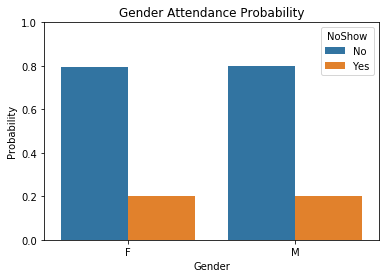

In [25]:
sb.barplot(x="Gender", y="genderPct", hue="NoShow", data=dfsxpct)
plt.ylim(0.0, 1.0)
plt.title('Gender Attendance Probability')
plt.xlabel('Gender')
plt.ylabel('Probability');

#### Conclusion of Gender impact on attendance : 

> The graph shows no marked difference between the genders on keeping/missing appointments, indicating gender appears to be a neutral factor in influencing attendance probability

**Next**: check on age

#### Define a function to calculate probability of a group's no show

In [26]:
def NoShow_Prob(df, col):
    df = pd.crosstab(index=df[col], columns=df.NoShow).reset_index()
    df['Prob'] = df.No/(df.No + df.Yes)
    #print('df[[col,"Prob"]]:',df[[col,'Prob']])
    return df[[col,'Prob']]

In [27]:
dfa=NoShow_Prob(df, 'Age')
dfa.head(5)

NoShow,Age,Prob
0,0,0.819441
1,1,0.817422
2,2,0.844252
3,3,0.816920
4,4,0.782910


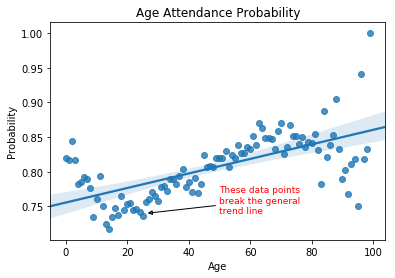

In [28]:
sb.regplot(dfa.Age, dfa.Prob)
s = '''These data points 
break the general 
trend line'''
plt.annotate(s, fontsize=9, xy=(26,0.74), xytext=(50,0.74), arrowprops=dict(arrowstyle='-|>'), color='r');
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Age Attendance Probability');

#### Conclusion of Age impact on attendance

> The general trend for attendance is trending upward with age. However, ages between 15 and 25 have lowest attendance rates below the regression line. Attendance rates start to rise above regression line from around age 47 till 80. From there, attendance rates start to drop below regression line from age 80 till 100.

In [29]:
def CondNoShowProb(df,cond,ind):
    p = df[df[cond] == ind].NoShow.value_counts()/df[df[cond] == ind].NoShow.value_counts().sum()
    return p

In [30]:
smP = CondNoShowProb(df,'SmsRmdr',1)
smP

No     0.724239
Yes    0.275761
Name: NoShow, dtype: float64

In [31]:
smPx = CondNoShowProb(df,'SmsRmdr',0)
smPx

No     0.832985
Yes    0.167015
Name: NoShow, dtype: float64

In [32]:
dff = pd.DataFrame([smP,smPx],
                   index=['SMS','No SMS'])
dff

,No,Yes
SMS,0.724239,0.275761
No SMS,0.832985,0.167015


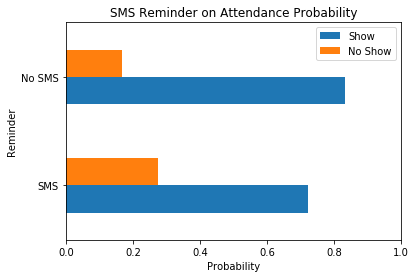

In [33]:
dff.plot.barh()
plt.xlim(0.0, 1.0)
plt.title('SMS Reminder on Attendance Probability')
plt.xlabel("Probability")
plt.ylabel("Reminder")
plt.legend(['Show','No Show']);

#### Conclusion of SMS Reminder impact on attendance

> The graph shows SMS reminder appears not to be a significant influence on attendance among patients who kept their appointments. However, in the group who missed their appointments, recipients of SMS reminders were roughly twice as likely to be a no show than those in the same group that didn't get SMS reminders. **This is a pretty interesting trend!**

<a id='Q2'></a>
### Research Question 2  - social factors impacting appointment attendance
 * Were welfare recipients more likely to keep their appointments?
 * Were patients with medical conditions more likely to keep their appointments?

In [34]:
wfP = CondNoShowProb(df,'OnWelfare',1)
wfP

No     0.762637
Yes    0.237363
Name: NoShow, dtype: float64

In [35]:
wfPx = CondNoShowProb(df,'OnWelfare',0)
wfPx

No     0.801935
Yes    0.198065
Name: NoShow, dtype: float64

In [36]:
dff = pd.DataFrame([wfP,wfPx],
                   index=['On','Off'])
dff

,No,Yes
On,0.762637,0.237363
Off,0.801935,0.198065


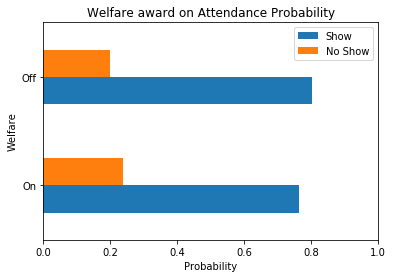

In [37]:
dff.plot.barh()
plt.xlim(0.0, 1.0)
plt.title('Welfare award on Attendance Probability')
plt.xlabel("Probability")
plt.ylabel("Welfare")
plt.legend(['Show','No Show']);

#### Conclusion of Welfare impact on attendance

> In the group who **kept** their appointments, patients **not on** welfare had slightly better attendance than those in the same group who were **on** welfare. The trend is also true in the group who **missed** their appointments. 
>
>One would be inclined to assume welfare award is a (somewhat) significant influence on attendance probability, but in this case, the data is indicating otherwise!    

**Next**: check if medical conditions influence patients' attendence.

In [38]:
# find attendance probability for those with hypertension condition
hpP = CondNoShowProb(df,'Hypertension',1)
hpP

No     0.826972
Yes    0.173028
Name: NoShow, dtype: float64

In [39]:
# find attendance probability for those without hypertension condition
hpPx = CondNoShowProb(df,'Hypertension',0)
hpPx

No     0.790971
Yes    0.209029
Name: NoShow, dtype: float64

In [40]:
# find attendance probability for those with diabetes condition
diP = CondNoShowProb(df,'Diabetes',1)
diP

No     0.819967
Yes    0.180033
Name: NoShow, dtype: float64

In [41]:
# find attendance probability for those without diabetes condition
diPx = CondNoShowProb(df,'Diabetes',0)
diPx

No     0.796377
Yes    0.203623
Name: NoShow, dtype: float64

In [42]:
# find attendance probability for those with alcoholism condition
alP = CondNoShowProb(df,'Alcoholism',1)
alP

No     0.798512
Yes    0.201488
Name: NoShow, dtype: float64

In [43]:
# find attendance probability for those without alcoholism condition
alPx = CondNoShowProb(df,'Alcoholism',0)
alPx

No     0.798059
Yes    0.201941
Name: NoShow, dtype: float64

In [44]:
# find attendance probability for those with handicap condition
hdP = CondNoShowProb(df,'Handicap',1)
hdP

No     0.819239
Yes    0.180761
Name: NoShow, dtype: float64

In [45]:
# find attendance probability for those without handicap condition
hdPx = CondNoShowProb(df,'Handicap',0)
hdPx

No     0.797636
Yes    0.202364
Name: NoShow, dtype: float64

In [46]:
# build a dataframe to represent the pandas series of the 4 medical condition 
dff = pd.DataFrame([hpP,hpPx,
                    diP,diPx,
                    alP,alPx,
                    hdP,hdPx],
                   index=['Hipertension','No Hipertension',
                          'Diabetes','No Diabetes',
                          'Alcoholism','No Alcoholism',
                          'Handicap','No Handicap'])
dff

,No,Yes
Hipertension,0.826972,0.173028
No Hipertension,0.790971,0.209029
Diabetes,0.819967,0.180033
No Diabetes,0.796377,0.203623
Alcoholism,0.798512,0.201488
No Alcoholism,0.798059,0.201941
Handicap,0.819239,0.180761
No Handicap,0.797636,0.202364


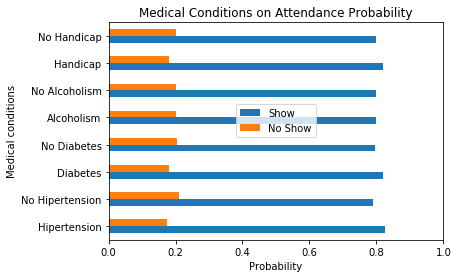

In [47]:
# Plotting the result
dff.plot.barh()
plt.xlim(0.0, 1.0)
plt.title('Medical Conditions on Attendance Probability')
plt.xlabel("Probability")
plt.ylabel("Medical conditions")
plt.legend(['Show','No Show'], loc='center',bbox_to_anchor=(0.5, 0.55));

#### Conclusion of Medical conditions impact on attendance

> In the **kept the appointment** group, patients who suffered from the 4 listed medical conditions had roughly the same attendance probability as their peers in the same group who did not have the same medical conditions. The trend is similar among those in the **missed the appointment** group who did/didn't have the conditions.
>
> Again, here the data indicates a different trend than one that most would have typically assumed is true, i.e. patients with medical conditions would be more likely to keep/miss their appointments than their counterparts who were free of the same conditions. An **interesting finding indeed!**    

<a id='Q3'></a>
### Research Question 3  - geographical factor impacting appointment attendance
 * What is the effect of hospital locations on patients keeping/missing their appointments?
 
 > Let's examine patient attendance ratio in each neighbourhood to see if certain locations had higher/lower attendence trends compare with nation wide average attendance ratio.

In [48]:
# Find attendance ratios for both show and no show groups (unstack NoShow)
ldf=df.groupby(['Locality','NoShow']).count().SmsRmdr.unstack('NoShow')
ldf.head(6)

NoShow,No,Yes
Locality,,
AEROPORTO,7.0,1.0
ANDORINHAS,1740.0,518.0
ANTÔNIO HONÓRIO,220.0,50.0
ARIOVALDO FAVALESSA,220.0,62.0
BARRO VERMELHO,332.0,91.0
BELA VISTA,1523.0,384.0


In [49]:
# unstack operation introduces a NaN row
ldf.isnull().sum()

NoShow
No     1
Yes    1
dtype: int64

In [50]:
# fill the NaN row with a value of 0
ldf.fillna(0, axis=0, inplace=True)
ldf.isnull().sum()

NoShow
No     0
Yes    0
dtype: int64

In [51]:
# Express the counts for both groups in percentage
ldfp = ldf.apply(lambda x: x/(x['No']+x['Yes']), axis=1)
ldfp.head(6)

NoShow,No,Yes
Locality,,
AEROPORTO,0.875000,0.125000
ANDORINHAS,0.770593,0.229407
ANTÔNIO HONÓRIO,0.814815,0.185185
ARIOVALDO FAVALESSA,0.780142,0.219858
BARRO VERMELHO,0.784870,0.215130
BELA VISTA,0.798637,0.201363


In [52]:
# find the average attendance percentage nation wide 
avgShowPct = (df.groupby(['NoShow'])['Locality'].count() / df.NoShow.count())[0] 
avgShowPct

0.7980726598199339

In [53]:
# find the average abscence percentage nation wide
avgNoShowPct = (df.groupby(['NoShow'])['Locality'].count() / df.NoShow.count())[1]
avgNoShowPct

0.20192734018006606

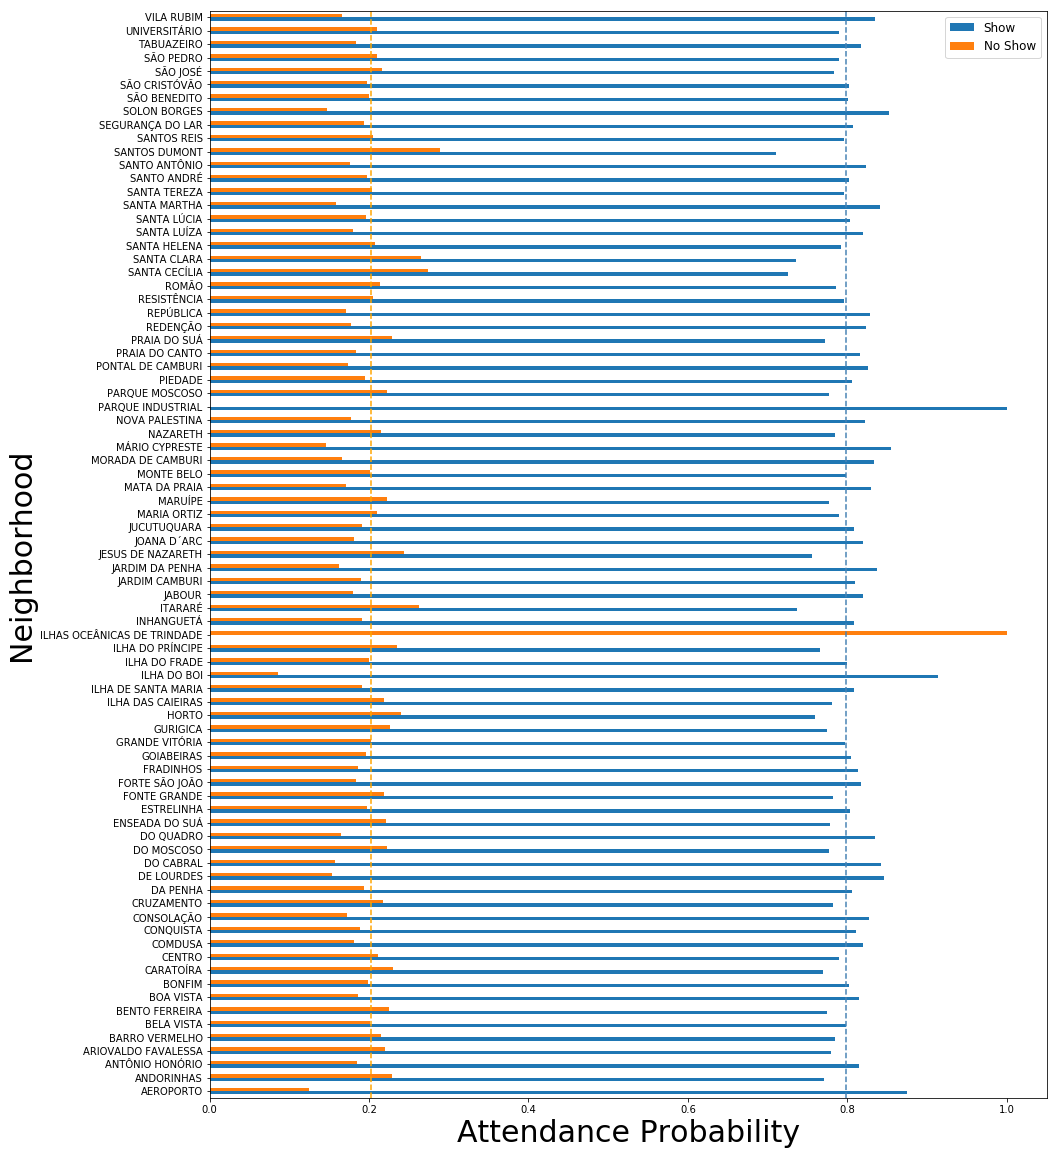

In [54]:
# plot the result
ldfp.plot.barh(figsize=(15,20))
plt.ylabel('Neighborhood',fontsize=30)
plt.xlabel('Attendance Probability',fontsize=30)
plt.legend(['Show','No Show'], fontsize='large')
plt.axvline(avgShowPct, color='steelblue', linestyle='--')
plt.axvline(avgNoShowPct, color='orange', linestyle='--');
plt.show();

#### Conclusion of hospital geographical locations on attendence/absentee trends

> Several findings are apparent from this graph:  
> * Two geographical location groups, representing patients **who kept** and **who missed** their appointments respectively, are presented. The former group has a national average **show-up** ratio of ~80%, while the latter, a national average **no-show** ratio of ~20%. 
>
>
> * In the graph, PARQUE INDUSTRIAL location didn't record any **no-show** count, whereas ILHAS OCEÂNICAS DE TRINDADE, zero **show-up** count. Hence, both appear to have 100% **show-up** and **no-show** ratios respectively.
>
>
> * The **show-up** ratios of patients in the **kept the appointment** group in most locations are in line with the group's national average **show-up** ratio. Notable exceptions above national average are ILHA DO BOI, DO QUADRO, DO CABRAL, DE LOURDES and AEROPORTO. Whereas SANTOS DUMONT, SANTA CLARA, SANTA CECÍLIA, JESUS DE NAZARETH, ITARARÉ, ILHA DO PRÍNCIPE, HORTO, CARATOÍRA, BENTO FERREIRA, ANDORINHAS and AEROPORTO, below national average.
>
>
> * The **no-show** ratios of patients in the **missed the appointment** group in most locations are in line with the group's national average **no-show** ratio. Notable exceptions above national average are SANTOS DUMONT, SANTA CLARA, SANTA CECÍLIA, JESUS DE NAZARETH, ITARARÉ, HORTO and CARATOÍRA. Whereas VILA LUBIM, SOLON BORGES, SANTA MARTHA, REPÚBLICA, REDENÇÃO, PONTAL DE CAMBURI, MÁRIO CYPRESTE, JARDIM DA PENHA, ILHA DO BOI and AEROPORTO, below national average.



<a id='conclusions'></a>
## Conclusions
### Summary findings of the 3 research questions:
<a id='Q1'></a>
### Research Question 1 - generic factors impacting appointment attendance
* Influence of gender, age, SMS reminder on patients missing their appointments
>
> gender appears to be a neutral factor in influencing attendance probability
>
> The general trend for attendance is upward with age. However, ages between 15 and 25 have lowest attendance rates below the regression line. Attendence rates start to rise above regression line from around age 47 till 80. After that, attendance rates start to drop again from age 80 till 100.
>
> SMS reminder appears not to be a significant influence on attendance among patients who kept their appointments. However, in the group who **missed** their appointments, recipients of SMS reminders were roughly twice as likely to be a no-show than those in the same group that didn't get SMS reminders.
>

<a id='Q2'></a>
### Research Question 2  - social factors impacting appointment attendance
 * Were welfare recipients more likely to keep their appointments?
 * Were patients with medical conditions more likely to keep their appointments?
>
> In the group who **kept** their appointments, patients **not on** welfare had slightly better attendance than those in the same group who were **on** welfare. The trend is also true in the group who **missed** their appointments.
>
> In the **kept the appointment** group, patients who suffered from the 4 listed medical conditions had roughly the same attendance probability as their peers in the same group who did not have the same medical conditions. The trend is similar among those in the **missed the appointment** group who did/didn't have the conditions.
>

<a id='Q3'></a>
### Research Question 3  - geographical factor impacting appointment attendance
 * What is the effect of hospital locations on patients keeping/missing their appointments?
> * Two geographical location (**kept** and **missed** appointment) groups each has a national average **show-up** and **no-show** ratios of ~80% and ~20%, respectively. 
>
>
>
> * One location (PARQUE INDUSTRIAL) has no **no-show** count, and the other (ILHAS OCEÂNICAS DE TRINDADE) no **show-up** count. Leading to both appear to have 100% **show-up** and **no-show** ratios respectively.
>
>
>
> * The **show-up** ratios of patients in the **kept the appointment** group in most locations are in line with the group's national average **show-up** ratio. There are notable exceptions in both above and below national average camps.
>
>
>
> * The **no-show** ratios of patients in the **missed the appointment** group in most locations are in line with the group's national average **no-show** ratio. There are notable exceptions in both above and below national average camps. 



## Limitation
* The scope of this project implies no deep statistical tests were performed in producing this analysis report. Thus, the causality of the analyzed factors on patients' behaviours is limited. 


* The correlations between the analyzed data elements presented in this report were deduced from simplistic perspectives of the provided dataset (albeit NumPy/Pandas functionality that goes beyond what was covered in the course was utilized to perform data analysis where appropriate). 


* Visual presentation of results in this analysis report is confined to commonly used Matplotlib and Seaborn functionality (albeit with more than 2 kinds of plots created).     

# References

### DAND Introduction to Data Analysis 
[Lesson 3 : The Data Analysis Process](https://youtu.be/Ae_UOATWmDM)

[Lesson 4 : Data Analysis Process - Case Study 1](https://youtu.be/Ui1rF6McOBA)

[Lesson 5 : Data Analysis Process - Case Study 2](https://youtu.be/u_qB4w4kL1o)



### Python, Pandas, Matplotlib, Seaborn & Miscellaneous 
[pandas - Select from MultiIndex by Level | pandas Tutorial](https://riptutorial.com/pandas/example/13285/select-from-multiindex-by-level)

[How to convert the multi index series into a Data frame in python? - tools - Data Science, Analytics and Big Data discussions](https://discuss.analyticsvidhya.com/t/how-to-convert-the-multi-index-series-into-a-data-frame-in-python/5119/2)

[matplotlib - How to control the legend in Seaborn - Python - Stack Overflow](https://stackoverflow.com/questions/47542104/how-to-control-the-legend-in-seaborn-python)

[python - Why plt.figure(figsize=(w,h)) has no effect on df.barh() but plt.rcParams['figure.figsize'] = [w,h] does? - Stack Overflow](https://stackoverflow.com/questions/55062657/why-plt-figurefigsize-w-h-has-no-effect-on-df-barh-but-plt-rcparamsfigur)

[mwaskom/seaborn-data: Data repository for seaborn examples](https://github.com/mwaskom/seaborn-data)